# Lab 5-2 / Intro to ATLAS Data
### : Invariant mass

PHYS 427\
2/25/2020 (Tue)\
Jin Kyoung Lee

In this assignment, we will look up what Lorentz 4 vectors and invariant mass are, then will emulate the invariant mass of the Z boson example from Jupyter notebooks.

### 1. Description of Lorentz 4 vectors and invariant mass

#### - Lorentz 4 Vectors
Four-vector is a vector that has four components. These four components transform under Lorentz transformation. For this assignment, we will use four-momentum vector to calculate the invariant mass.

Four-momentum (of a particle with relativistic energy E and three-momentum):

$\bf{p}$ $= (p_x, p_y, p_z)$

$p = (p^0, p^1, p^2, p^3) = (\frac{E}{c},$$\bf{p}$$) = (\frac{E}{c}, p_x, p_y, p_z)$

where,

$p_x = p_Tcos\phi$

$p_y = p_Tsin\phi$

$p_z = \frac{p_t}{tan\theta} = p_Tsinh\eta$

Moreover, product of any two four-vectors is invariant, so by creating four-vectors, we can find the invariant mass.

#### - Invariant Mass
In relativity, an object's invariant mass is a value proportional to the norm of its four-momentum, and it has a unit of mass. We can say that the dot product of any two four-vectors is invariant mass. Therefore, by using our definition of four-vectors above, the invariant mass, $m_0$ for an object that has four-momentum $p^\mu = (E/c,$ $\bf{p}$$)$ is:

$p^\mu p_\mu = - (E/c)^2 + p_x^2 + p_y^2 + p_z^2 = -m_0^2c^2$

$m_0 = \sqrt{E^2/c^4 - p^2/c^2} = \frac{1}{c^2}\sqrt{E^2-p^2c^2}$, where c is the speed of light.

### 2. Emulating the invariant mass calculation for Z boson mass

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import uproot
import seaborn as sns
import pandas as pd
import awkward

### - Using the same data used in example notebook (Zee simulated data)

In [2]:
testZZ = uproot.open("ATLAS_13TeV_2020/testZZ.root")
# testZZ.root: this is the root file (13TeV) used in the simple histograms example

In [3]:
testZZ.keys()

[b'mini;1']

In [4]:
testZZ_tree = testZZ["mini"].lazyarrays(["lep_n","lep_charge","lep_type","lep_pt","lep_eta","lep_phi","lep_E"], persistvirtual=True)

In [5]:
testZZ_tree.columns

['lep_n', 'lep_charge', 'lep_type', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_E']

* lep_n: number of pre-selected leptons
* lep_charge: charge of the lepton
* lep_type: number of signifying the lepton type (e or µ)
* lep_pt: transverse momentum of the lepton
* lep_eta: pseudo-rapidity, η, of the lepton
* lep_phi: azimuthal angle, φ, of the lepton
* lep_E: energy of the lepton

In [6]:
awkward.save("test-feature.awkd", testZZ_tree, mode="w")

In [7]:
testdata = awkward.load("test-feature.awkd")

#### Making cuts
* Cut 1: at leat 2 leptons
* Cut 2: leptons with opposite charge
* Cut 3: leptons of the same family (2 electrons or 2 muons)

In [8]:
# Cut #1: At least 2 leptons
lep2selected = testdata[testdata["lep_n"] == 2]
awkward.save("lep2selected-event.awkd", lep2selected, mode="w")
testdata2 = awkward.load("lep2selected-event.awkd")

In [9]:
# Cut #2: Leptons with opposite charge
oppoqselected = testdata2[testdata2["lep_charge"][:,0] != testdata2["lep_charge"][:,1]]
awkward.save("oppoqselected-event.awkd", oppoqselected, mode="w")
testdata3 = awkward.load("oppoqselected-event.awkd")

In [10]:
# Cut #3: Leptons of the same family (2 electrons or 2 muons)
samefamselected = testdata3[testdata3["lep_type"][:,0] == testdata3["lep_type"][:,1]]
awkward.save("samefamselected-event.awkd", samefamselected, mode="w")
testdatafinal = awkward.load("samefamselected-event.awkd")

$p_x = p_Tcos\phi$

$p_y = p_Tsin\phi$

$p_z = \frac{p_t}{tan\theta} = p_Tsinh\eta$

4-momentum: $p = (\frac{E}{c}, p_x, p_y, p_z)$

Invariant mass $m = \frac{1}{c^2}\sqrt{E^2-p^2c^2}$, in narutal units where c = 1, $m = \sqrt{E^2-p^2}$

In [11]:
# Converting (pt, eta, phi, m) to (px, py, pz, E)

# px = pt*cos(phi)
px1 = (testdatafinal["lep_pt"][:,0]/1000) * np.cos(testdatafinal["lep_phi"][:,0])
px2 = (testdatafinal["lep_pt"][:,1]/1000) * np.cos(testdatafinal["lep_phi"][:,1])

# py = pt*sin(phi)
py1 = (testdatafinal["lep_pt"][:,0]/1000) * np.sin(testdatafinal["lep_phi"][:,0])
py2 = (testdatafinal["lep_pt"][:,1]/1000) * np.sin(testdatafinal["lep_phi"][:,1])

# pz = pt*sinh(eta)
pz1 = (testdatafinal["lep_pt"][:,0]/1000) * np.sinh(testdatafinal["lep_eta"][:,0])
pz2 = (testdatafinal["lep_pt"][:,1]/1000) * np.sinh(testdatafinal["lep_eta"][:,1])

# E
E1 = testdatafinal["lep_E"][:,0]/1000
E2 = testdatafinal["lep_E"][:,1]/1000

In [12]:
px = px1 + px2
py = py1 + py2
pz = pz1 + pz2
E = E1 + E2

In [13]:
# Invariant mass calculation
invmass = np.sqrt(np.square(E) - np.square(px) - np.square(py) - np.square(pz))

In [14]:
def hist(lep_num, binNum, xlim): # Defining function for plotting histogram
    plt.figure(figsize = (10, 5))
    sns.distplot(lep_num, kde = False, bins = binNum)
    plt.title("\nMass of the Z boson\n")
    plt.xlim(xlim)
    plt.xlabel("Mass[GeV]")
    plt.ylabel("events")
    plt.show()
    print("\nEntries:", len(lep_num), "| Mean:", np.mean(np.array(lep_num)), "| Std:", np.std(np.array(lep_num)))

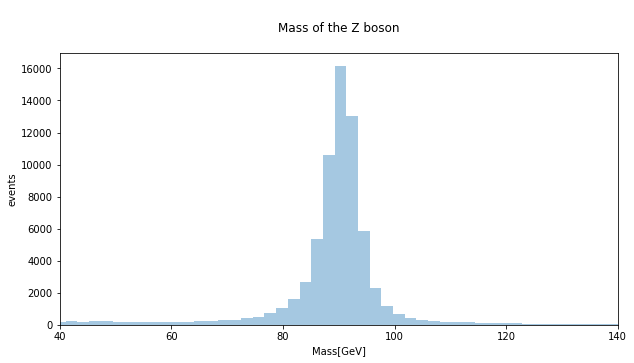


Entries: 70881 | Mean: 88.71438 | Std: 23.034468


In [15]:
hist(invmass, 500, [40,140])

### - Using downloaded data (other than the one used in example notebook)

In [23]:
lep2_A = uproot.open("ATLAS_13TeV_2020/exactly2lep/exactly2lep/Data/data_A.exactly2lep.root")
# data_A.exactly2lep.root: ATLAS 13 TeV samples collection exactly two leptons (electron or muon),
# for 2020 Open Data release; ..4lep/Data/data_A.exactly2lep.root (http://opendata.cern.ch/record/15007#)
lep2_A.keys()

[b'mini;1']

In [79]:
lep2_A_tree = lep2_A["mini"].lazyarrays(["lep_n","lep_charge","lep_type","lep_pt","lep_eta","lep_phi","lep_E"], persistvirtual = True)

In [80]:
lep2_A_tree.columns

['lep_n', 'lep_charge', 'lep_type', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_E']

In [81]:
awkward.save("lep2-A-feature.awkd", lep2_A_tree, mode = "w")

In [82]:
lep2A = awkward.load("lep2-A-feature.awkd")

In [83]:
# Making cuts
# (Since we are using exactly 2 lepton data, we don't need to make cuts for having 2 leptons)

# Cut 1: Leptons with opposite charge
totalq0 = lep2A[lep2A["lep_charge"][:,0] != lep2A["lep_charge"][:,1]]
awkward.save("totalq0-A.awkd", totalq0, mode = "w")
lep2A1 = awkward.load("totalq0-A.awkd")

# Cut 2: Leptons of the same family (2 electrons or 2 muons)
samefam = lep2A1[lep4C1["lep_type"][:,0] == lep2A1["lep_charge"][:,1]]
awkward.save("samefam-A.awkd", samefam, mode = "w")
lep2Afinal = awkward.load("samefam-A.awkd")

ValueError: value too large

I tried to make cuts, however, kept getting the error "value too large". So, tried to resolve this error by searching the web, but couldn't find a solution.